# Making a simple Neural Network  (80%)

- In this assignment, we attempt to use [**mnist dataset**](http://yann.lecun.com/exdb/mnist/) to train our neural network, which concluded by Handwritten digital images from 0 to 9

- The training and testing method - use **labelled images** (e.g., the image contains a cat) to train a **neural network**
  - [Training] Adjust the **neural network weights** by comparing the **estimated (output) labels** and the **ground truth** labels
  - [Testing] Given another set of labelled images (testing dataset), we evaluate the **accuracy** of the trained neural network.

# (1) Data Preparation

# Original Dataset Analysis
* Original images are transformed into a csv file, where each line represents an image sample (i.e., a Grayscale image of numbers, 0 ~ 9)
    * There are 60000 samples in **mnist_train.csv** as training data and 10000 samples in **mnist_test.csv** as testing data.
* The first value of each line in csv file is the **label** of this image (i.e., **ground truth**), the follwing 784 values (splitted by comma) is the grayscale level of the 28×28 image. 
* In short, the input layer of our neural network contains 784 input values, $\vec{X}$.

### **Tips:**
* In this dataset, value 0 represents a white pixel and value 255 represents a black pixel.

Example:target label:   [0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
training inputs shape: (784, 60000) training targets shape: (10, 60000) testing inputs shape: (784, 10000) testing target shape: (10, 10000)


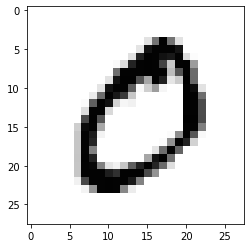

In [4]:
# import the handwritten number dataset mnist(actually a subset of mnist called mnist_train.csv and mnist_test.csv
import numpy as np
import matplotlib.pyplot as plt

def dataretrieval():
    # Load the mnist traing data in the csv file to list
    train_data_file = open("mnist_dataset/mnist_train.csv", 'r')
    training_data_list = train_data_file.readlines()
    train_data_file.close()
    
    # Load the mnist testing data in the csv file to list
    test_data_file = open("mnist_dataset/mnist_test.csv", 'r')
    testing_data_list = test_data_file.readlines()
    test_data_file.close()
    
    # The second image in mnist_train as an example for an original image and its target label in the mnist dataset
    all_values_e = training_data_list[1].split(',')
    image_array = np.asfarray(all_values_e[1:]).reshape((28,28))
    plt.imshow(image_array, cmap = 'Greys', interpolation = 'None')
    target_label = np.zeros(10) + 0.01
    target_label[int(all_values_e[0])] = 0.99
    print("Example:target label:  ",target_label)
    
    # Preparing the training data
    training_inputs=[]
    training_targets=[]
    for record in training_data_list: #for training data
        all_values = record.split(',')
        training_inputs_list = (np.asfarray(all_values[1:]) / 255.0*0.99) + 0.01 # Scale the original pixel value in [0,255] into [0.01,1]
        training_targets_list = np.zeros(10) + 0.01 #construct the target label of each image in this way:the element corresponding to correct class is set to 0.99,others are set to 0.01
        training_targets_list [int(all_values[0])] = 0.99
        training_inputs.append(training_inputs_list)
        training_targets.append(training_targets_list)
    
    # Preparing the testing data
    testing_inputs=[]
    testing_targets=[]
    for record in testing_data_list: # for testing data
        all_values = record.split(',')
        testing_inputs_list = (np.asfarray(all_values[1:]) / 255.0*0.99) + 0.01
        testing_targets_list = np.zeros(10) + 0.01
        testing_targets_list [int(all_values[0])] = 0.99
        testing_inputs.append(testing_inputs_list)
        testing_targets.append(testing_targets_list)
    
    # Convert the input list to 2d array
    training_imgs = np.array(training_inputs, ndmin = 2).T
    training_labels = np.array(training_targets, ndmin = 2).T
    testing_imgs = np.array(testing_inputs, ndmin = 2).T
    testing_labels = np.array(testing_targets, ndmin = 2).T
    return training_imgs, training_labels,testing_imgs,testing_labels

training_imgs, training_labels,testing_imgs,testing_labels=dataretrieval() #training_imgs, training_labels,testing_imgs,testing_labels is set of training samples,training targets,testing samples,testing targets respectively
print("training inputs shape:",training_imgs.shape,"training targets shape:",training_labels.shape, "testing inputs shape:",testing_imgs.shape, "testing target shape:",testing_labels.shape)

# Output Vector Understanding
* The neural network is required to classify the input images to 0 to 9 (10 classes in total). 
* To complete this, one idea is to estimate an **output neurons (vector)** of 10 labels, where each neuron (value) indiciates the "probability" of the image in that label.
    * As an example in the figure below, example "5" has very high chance to be classified into label 5 (0.99).
* Given the output vecotr $\vec{Y}$, you can find the most likely label by returning $\arg\max(\vec{Y})$ (the label who is the maximun in the vecotr $\vec{Y}$).
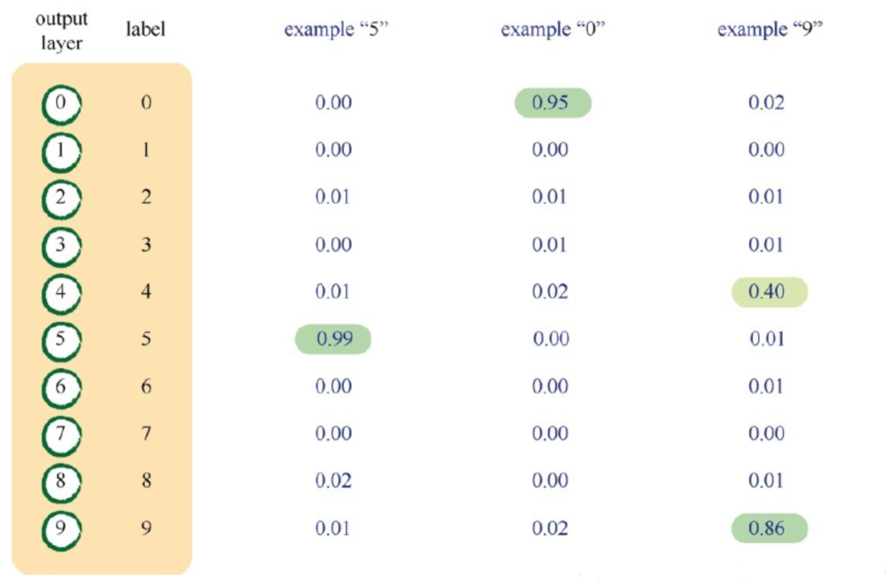

# (2) Neural Network Introduction

First, we illustrate a Neural network structured as follows (which has only one hidden layer)
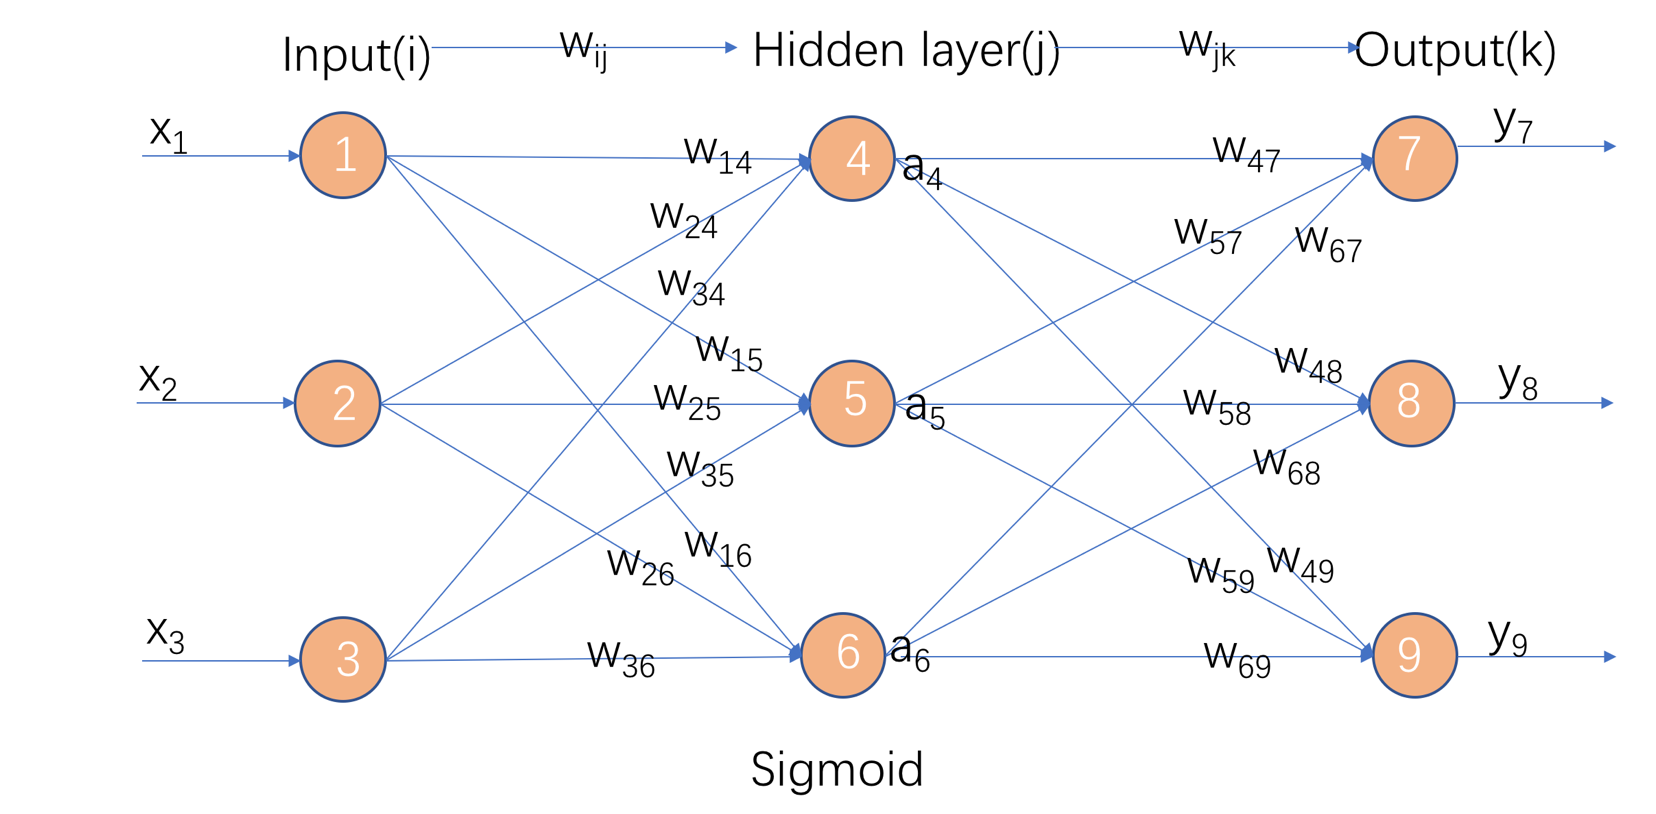

where $\vec{X}=[x_1, x_2, x_3, ...]$ indicates the features(pixel values) of an image $X$.

# (2.1) Feed Forward Network

## Hidden layer
The hidden layer vector $\vec{A}$ can be calculated by a linear equation as follows (**forward basic formula**)
\begin{equation}
\vec{A}= f(W_{hidden}\cdot\vec{X})
\label{eq:forward1}\tag{forward 1}
\end{equation}
where $f(\cdot)$ is the **activation function** (see below). $W_{hidden}$ is the neurel network model (e.g., a matrix that indicates the edge weights between $\vec{X}$ and $\vec{A}$ in the figure, such as $w_{41}$, $w_{42}$, ... )

**Let us understand this equation based on the figure above**<br>
> $\vec{X}=[x_1, x_2, x_3]$<br>
$\vec{A}=[a_4, a_5, a_6]$<br>
$a_4= x_1*w_{14} + x_2*w_{24} + x_3*w_{34}$<br>
$a_5= x_1*w_{15} + x_2*w_{25} + x_3*w_{35}$<br>
...<br>

For the representation of $W_{hidden}$ and $W_{output}$,please refer Back Propagation slides.

We can calcualte $\vec{A}=[a_4,a_5,a_6]$ by a **matrix multiplication** ([n-D array multiply 1-D array](https://stackoverflow.com/questions/54376661/understand-numpy-dot-with-n-d-array-and-1-d-array))<br>

\begin{equation}
\vec{A}=f(np.dot(W_{hidden},\vec{X}))\tag{forward 1}
\end{equation}


## Ouput layer
Similarly, the output layer vector $\vec{Y}=[y_7,y_8,y_9]$ can be calculated as
\begin{align}
\vec{Y}&=f(W_{output} \cdot\vec{A})\\
&=f(W_{output} \cdot f(W_{hidden}\cdot\vec{X}))\\
&=f(np.dot(W_{output},f(np.dot(W_{hidden},\vec{X}))))
\label{eq:forward2}\tag{forward 2}
\end{align}

## Activation function
According to [geeksforgeeks](https://www.geeksforgeeks.org/activation-functions-neural-networks/), activation function decides, whether a neuron (e.g., a variable) should be activated or not straight by calculating weighted sum and further adding **bias** with it (in this assignment, we omit the bias in the calculation). The purpose of the activation function is to introduce non-linearity into the output of a neuron.

In other words, this is a function to transform the original value (from linear equation) to another value (e.g., non-linearity). In this assignment, we simply adopt **Sigmoid activation function**

$$ f(\vec{X})=[\frac{1}{1+e^{-x_1}}, \frac{1}{1+e^{-x_2}},..., \frac{1}{1+e^{-x_n}}] \tag{forward 3}$$
where $\vec{X}=[x_1,x_2,...,x_n]$.

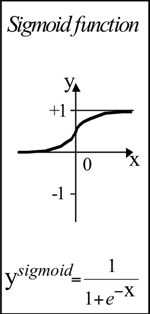

- **Sigmoid activation function** is nonlinear in nature. Combinations of this function are also nonlinear!
    - It has a smooth gradient too.
    - The output of the activation function is always going to be in range (0,1) compared to (-inf, inf) of linear function. So we have our activations bound in a range. 

### The **derivative** of sigmoid function 
$$f^{'}(x_1)=\frac{1}{1+e^{-x_1}} = f(x_1)\cdot (1-f(x_1)) \tag{for $x_1$}$$
Suppose $f(\vec{X})=\vec{Y}$, the $f^{'}(\vec{X})$ will be
$$f^{'}(\vec{X})=[f(x_1)\cdot (1-f(x_1)), \dots ,  f(x_n)\cdot (1-f(x_n))] \tag{gradient}$$

# (2.2) Deimension of the vectors and matrices
- The input layer node is set to $784$ (the input data 28x28 pixels)
$$\vec{X}.shape=(784,1)$$

- The hidden layer nodes is set to $100$ ($hidden layer nodes$ is set to 100)
$$W_{hidden}.shape=(100,784) \qquad  \vec{A}.shape=(100,1)$$

- The output layer nodes is set to $10$ (the output represents what the handwritten number is classified in [0,9],refer to Data Preparation-Target Vector Construction)

$$W_{output}.shape=(10,100)\qquad\vec{Y}.shape=(10,1)$$
### **Tips:**
* In this assignment, we simply feed 60000 inputs into neural network one after another. This means that we iteratively update the weights of the neural network. 

# (2.3) How to update the weight matrix  - Backpropagtion

In a neural network, the **weight matrix** (i.e., the model) is updated according to **the errors** between the **groundtruth output** (target label) and the neural network estimation. The most common way to update the weights is known as **back-propagation**.

## Error Function Definition

In order to derive a weight learning rule for linear units. We first specify a measure for the training error of a hypothesis (**output vector**), relative to the training samples. The error function is defined as
$$E(W)=\frac{1}{2}\sum(\vec{Y_d}-\vec{Y})^2$$
where $\vec{Y_d}$ is the desire output (**groundtruth vector**) of the current training sample, $\vec{Y}$ is the **output vector** of the neural network (based on $W$), and $W$ is the weight matrix of hidden/output layer ($W_{hidden}$ and $W_{output}$).

## Derivative of $E(W)$

Simply speaking, the error will be used as the **sign** to update the weight (based on gradient optimization, detail omitted).

Mathematically, this vector derivative is called the partial gradient of $E$ with respect to $W$, written $\frac{\partial{E}}{\partial{W}}$:

<center>$$\frac{\partial{E}}{\partial{W}}=[\frac{\partial{E}}{\partial{\vec{\omega_{1}}}},\frac{\partial{E}}{\partial{\vec{\omega_{2}}}},......,\frac{\partial{E}}{\partial{\vec{\omega_{n}}}}]$$</center>
    
Notice $\frac{\partial{E}}{\partial{\vec{\omega_j}}}$ is a vector, whose components are the partial derivatives of $E$ with respect to each weight vector $\vec{\omega_j}$ (to be explained shortly).

## Weight Training 
(you could skip the discussion if you cannot understand the math equations)

- The vector of derivatives that form the gradient can be obtained by differentiating $E$ from the error fuction.

### For Output Layer:
\begin{align}
\frac{\partial{E}}{\partial{\vec{\omega_{j}}}}&=[\frac{\partial{E}}{\partial{w_{jx}}},\dots,\frac{\partial{E}}{\partial{w_{jz}}}]
\end{align}

where $\omega_j=[w_{jx},\dots,w_{jz}]$ is the set of weights from the $j$-th neuron at hidden layer to all neuron at output layer.

\begin{align}
\frac{\partial{E}}{\partial{w_{jx}}}&=\frac{\partial{E}}{\partial{net_x}}\frac{\partial{net_x}}{\partial{w_{jx}}}
\tag{$net_x=\sum w_{jx} a_j$}
\\
&=\frac{\partial{E}}{\partial{net_x}}\cdot a_j\\
&=\frac{\partial{E}}{\partial{y_x}}\cdot\frac{\partial{y_x}}{\partial{net_x}}\cdot a_j\\
\end{align}

\begin{align}
\frac{\partial{E}}{\partial{y_x}}&=\frac{\partial{(\frac{1}{2}\sum(\vec{Y_d}-\vec{Y})^2)}}{\partial{y_x}}\\
&=\frac{\partial{(\frac{1}{2}(\vec{y_{dx}}-\vec{y_x})^2)}}{\partial{y_x}}\\
&=-(y_{dx}-y_x)\\
\frac{\partial{y_x}}{\partial{net_x}}&=\frac{\partial{f(net_x)}}{\partial{net_x}}\\
&=y_x(1-y_x) a_j
\end{align}

Thereby,
\begin{align}
\frac{\partial{E}}{\partial{w_{jx}}}&=-(y_{dx}-y_x)y_x(1-y_x) a_j\\
\end{align}

- $a_j$ is $j$-th hidden layer neuron's output(as output layer's input). In this assignment, $\vec{A}$=[$a_1$,$a_2$,.....$a_{100}$].

- $\vec{\omega_{j}}$ is weights $[w_{jx}, ... w_{jz}]$ that $j$-th hidden layer neuron $a_j$ associated to all the output layer neurons. 

- In this assignment, $\vec{\omega_{j}}$'s dimention is (10,1) and $W_{output}$=[$\vec{\omega_{1}}$,$\vec{\omega_{2}}$,......,$\vec{\omega_{100}}$].

#### An example

$\vec{Y}=[y_1, y_2, \dots, y_{10}]$

$\vec{Y_d}=[y_{d1}, y_{d2}, \dots, y_{d10}]$

Suppose we want to update $\omega_4=[w_{47},w_{48},w_{49}]^T$, 

\begin{align}
\frac{\partial{E}}{\partial{w_{47}}}&=-(y_{d7}-y_7)y_7(1-y_7) a_4\\
\frac{\partial{E}}{\partial{w_{48}}}&=-(y_{d8}-y_8)y_8(1-y_8) a_4\\
\frac{\partial{E}}{\partial{w_{49}}}&=-(y_{d9}-y_9)y_9(1-y_9) a_4\\
\end{align}

#### In matrix representation

\begin{align}
\frac{\partial{E}}{\partial{w_{j}}}&=\frac{\partial{(\frac{1}{2}\sum(\vec{Y_d}-\vec{Y})^2)}}{\partial{\vec{\omega_j}}}\\
&=-(\vec{Y_d}-\vec{Y})\vec{Y}(1-\vec{Y}) a_j
\end{align}

### For Hidden Layer:
\begin{align}
\frac{\partial{E}}{\partial{\vec{\omega_{i}}}}&=\frac{\partial{(\frac{1}{2}\sum(\vec{Y_d}-\vec{Y})^2)}}{\partial{A}}·\frac{\partial{A}}{\partial{\vec{\omega_{i}}}}\\
&=\frac{\partial{(\frac{1}{2}(\vec{Y_d}-\vec{Y})^2)}}{\partial{f(W_{hidden}·\vec{X})}}·\frac{\partial{f(W_{hidden}·\vec{X})}}{\partial{\vec{\omega_{i}}}}\\
&=-W_{output}^T·(\vec{Y_d}-\vec{Y})·\vec{A}·(1-\vec{A})·x_i
\end{align}

- $x_i$ is $i$-th input (as hidden layer input) and $\vec{X}$=[$x_1$,$x_2$,$\dots$,$x_{784}$] (in our assignment).
- $\vec{\omega_{i}}$ is weights that ith input layer neuron associates to all the hidden layer neurons.$\vec{\omega_{i}}$ 's dimention is (100,1). $W_{hidden}$=[$\vec{\omega_{1}}$,$\vec{\omega_{2}}$,$\dots$,$\vec{\omega_{784}}$]

#### An example

In the following figure, the weight of 1st input layer neuron 1 that associates to all the hidden layer neurons (that are all connected to input $x_1$), $\vec{\omega_{1}}$=[$w_{14}$,$w_{15}$,$w_{16}$]^T, the weight of 4th hidden layer neuron associates to all the output layer neurons(have the same input $a_4$), $\vec{\omega_{4}}$=[$w_{47}$,$w_{48}$,$w_{49}$]^T
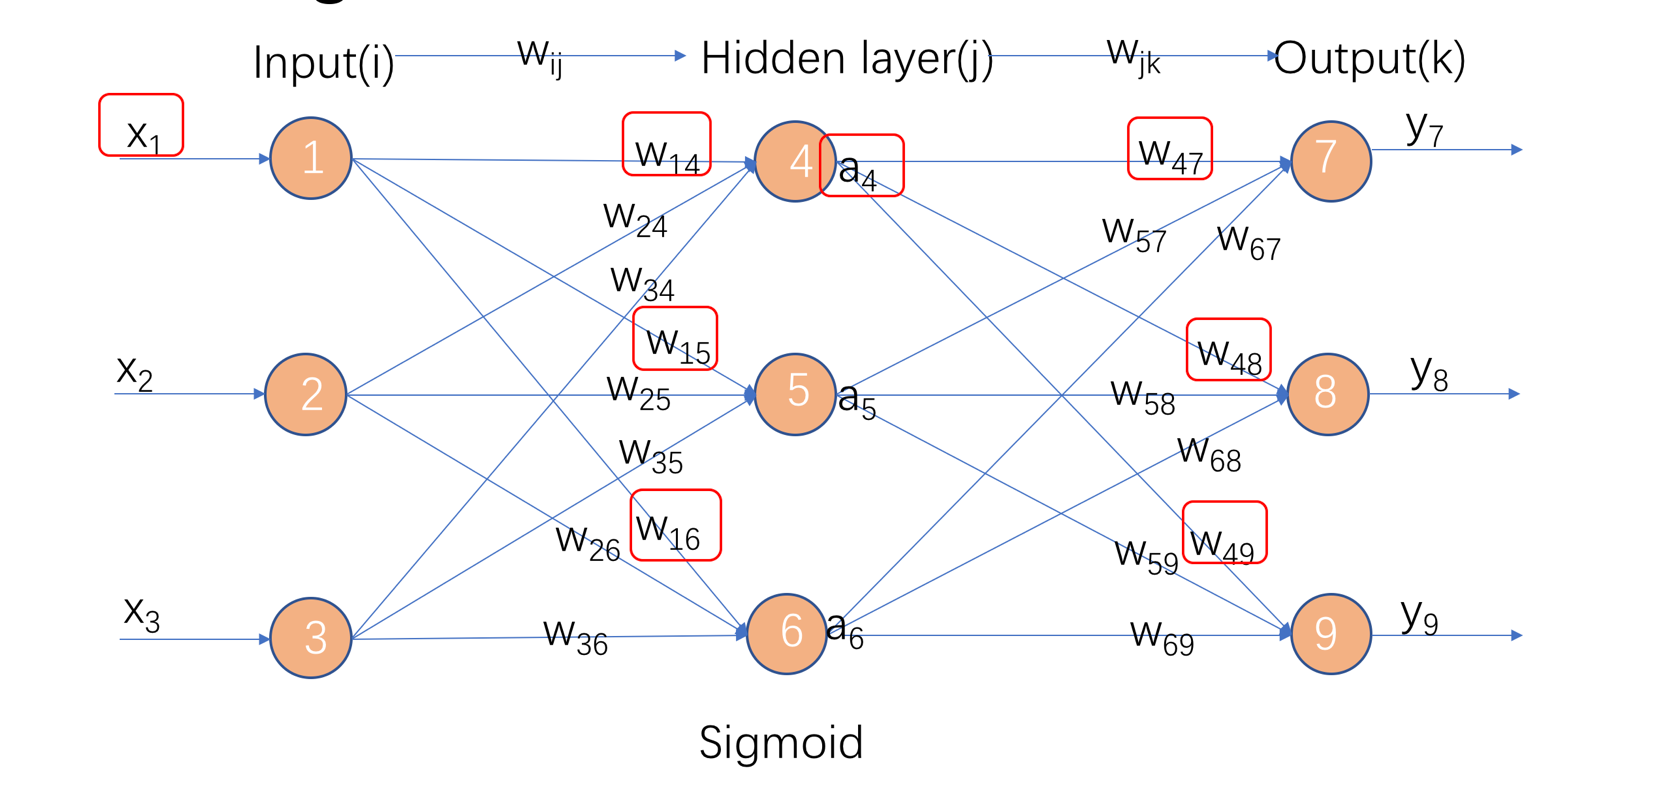

# Update the weights
Since the gradient specifies the direction of steepest increase of E, the training/weight updating rule for gradient ascent is

\begin{equation}
W=W+\Delta{W}\\
\Delta{W}=-\eta·\frac{\partial{E}}{\partial{W}}
\end{equation}

## For output layer
\begin{equation*}
W_{output}\xleftarrow{}W_{output}+\eta(\vec{Y_d}-\vec{Y})\cdot{\vec{Y}}\cdot{(1-\vec{Y})}\cdot\vec{A}^T
\label{eq:update_1} \tag{update 1}
\end{equation*}

## For hidden layer
\begin{equation}
W_{hidden}\xleftarrow{}W_{hidden}+\eta\cdot{W_{output}^T}(\vec{Y_d}-\vec{Y})\cdot{\vec{A}}\cdot{(1-\vec{A})}\cdot\vec{X}^T
\label{eq:update_2} \tag{update 2}
\end{equation}
where $\eta$ is the learning rate, a positive constant less than unity.

**Notice**: $\vec{X}$,$\vec{Y}$,$\vec{Y_d}$ is a current sample of all training_imgs,actual output,training_labels repectively,not feed all the 60000 samples to the neural network together.

**You need to implement the following functions in order to completet the assignment**

# (3) Initialize the Neural Network

0 6


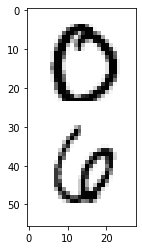

In [121]:
## Initialize parameters  
eta=0.3 # learning rate 
inputnodes=784 # input layer node number
hiddennodes=100 # hidden layer node number
outputnodes=10 # output layer node number

# setting the variables
sample_index = 88 # the index of the selected training sample
testing_index = 66 # the index of the selected testing sample
X = training_imgs[:, [sample_index]] # One training sample for training_imgs
Y_d = training_labels[:, [sample_index]] # Y_d is desired outpout(target label) of training sample X,the dimenson is the same as Y
X_T = testing_imgs[:, [testing_index]] # One testing sample for testing_imgs
Y_d_T = testing_labels[:, [testing_index]] # Y_d_T is desired outpout(target label) of testing sample X_T,the dimenson is the same as Y
print(np.argmax(Y_d), np.argmax(Y_d_T))
plt.imshow(np.concatenate((X.reshape((28,28)),X_T.reshape((28,28)))), cmap = 'Greys', interpolation = 'None')

# refer to (2.2)
Wh = np.random.normal(0.0, pow(inputnodes, -0.5), (hiddennodes, inputnodes)) # initialize hidden layer weight
Wo = np.random.normal(0.0, pow(hiddennodes, -0.5), (outputnodes, hiddennodes)) # initialize output layer weight

# (4) Functions used in Training Definition

In [122]:
# implement forward codes here
# refer to (2.1)
def forward(X,Wh,Wo):
    X=X.reshape(X.size,1)
    # calculate Equation (forward 1) using def sigmoid output
    A=sigmoid(Wh.dot(X))
    # calculate Equation (forward 2) using def sigmoid output
    Y=sigmoid(Wo.dot(A))
    return A,Y #Y is actual neural network unit output
    #Y=Sigmoid(W,X)

# implement backpropagation codes here
# refer (2.3)
def backpropagation(Wh,Wo,X,A,Y,Y_d):
    X=X.reshape(X.size,1)
    Y=Y.reshape(Y.size,1)
    Y_d=Y_d.reshape(Y_d.size,1)
    # calculate Equation (update 1) using forward 4
    Wo_updated = Wo + eta*(Y_d-Y).dot(Y.T).dot(1-Y).dot(A.T)
    # calculate Equation (update 2) using 
    Wh_updated = Wh + eta*(Wo.T).dot(Y_d-Y).dot(A.T).dot(1-A).dot(X.T)
    return Wh_updated,Wo_updated  

# implement activation function
# refer (2.1)
def sigmoid(x):
    # equation of forward 3
    # is used both in hidden layer and output layer
    OUTPUT = 1/(1 + np.exp(-x))
    return OUTPUT

# (5) Training

In [ ]:
# main logic of the training process
# iteratively train the model (up to #epoches)
Wh_temp, Wo_temp=Wh, Wo
epoches=100
for epoch in range(0,epoches):
    for X,Y_d in zip(training_imgs.T,training_labels.T):
        A,Y=forward(X,Wh_temp,Wo_temp) # input training data and updated weights in last iteration
        Wh_temp,Wo_temp=backpropagation(Wh_temp,Wo_temp,X,A,Y,Y_d) # update weights
Wh_updated,Wo_updated=Wh_temp,Wo_temp

# (6) Evaluate the neural network with testing data
- The images labels is **one-hot** representation, please refer to Data Preparation-Target Vector Construction
- The neural network will output an array of the probability of each class (0 to 9). We can simply pick the label of the maximum probability as the returned label.
    - The way to find the maximum index in NumPy is **np.argmax(x)**

In [118]:
# Example
import numpy as np
Y_d=[0.1,0.1,0.9,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
Y=[0.1,0.0,0.2,0.04,0.03,0.0,0.11,0.21,0.16,0.15]
if  np.argmax(Y_d)==np.argmax(Y): # Refer to Data Preparation-Target Vector Construction
    count_correct+=1

**Implement the following function** in order to return the accuracy of your trained model 

In [119]:
def evaluate(Wh_updated,Wo_updated,X_T,Y_d_T): #Use testing data with trained weights to evaluate your accuracy
    Y_T, A=forward(X_T,Wh_updated,Wo_updated)
    # For all testing images, you need to count the number of correctly identified labels as "count_correct"
    # and calculate the accuracy
    # [Your code here]
    global count_correct, count
    if (np.argmax(Y_T) == np.argmax(Y_d_T)):
        count_correct+=1
    count+=1
    return count,count_correct

# (7) Accuracy Calculation

In [130]:
# Calculate the accuracy
count_correct=0
count=0
for X_T,Y_d_T in zip(np.array(testing_imgs).T,np.array(testing_labels).T):
    evaluate(Wh_updated,Wo_updated,X_T,Y_d_T)
accuracy=count_correct/count
print(accuracy)

0.0081


# Written Question (20%)
1. Please explain the meaning of the following code in Data Preparation<br>
**image_array = np.asfarray(all_values_e[1:]).reshape((28,28))**<br>
2.  Please explain the reason of using the following code to weights<br>
**Wh = np.random.normal(0.0, pow(inputnodes, -0.5), (hiddennodes, inputnodes))**

    **Wo = np.random.normal(0.0, pow(hiddennodes, -0.5), (outputnodes, hiddennodes))**<br>

3. Please explain why we need the "training dataset" and "testing dataset".

3. Is it true that we will get better accuracy if we increase "epoches"? Why or why not?

**Your Answer**
1. It is reading from the 2nd elemet of all_values_e until the end. This is actually the image part of a row from the cvs file. Then using np.asfarray() to convert it into numpy array with float type. After all, reshape it as 28x28 matrix and assigned it to the variable image_array.
2. Using a random set of normal distributed numbers center around zero with a standard deviation as 1/sqrtOf(number of input nodes at the given layer) is to spread the weight balance between possitive and negative such that the weight matrix dot the input matrix can balance the resulting  matrix for next layer or output.
3. The training dataset is used to train up the model while the testing dataset is used to validate the accuracy of the trained model.
4. It is not always true unless it has not reached a minima. By increasing the "epoches", sometime it may be stucked at a local minima and got a poor accuracy.

# Bonus Question (+20%)
- Feel free to try some extra steps that may improve the accuracy.
    - For instance:more epoches, change activation function or learning rate, etc.
- The maximum training time is **20 minutes**.
    - For your reference, the TA computation trains the default model for 5 epoches in 6min 42s. 
    - We will terminate the training if it overruns
- The mark will be given based on the **relative accuracy**.

Please write down how you improve the accuracy in this **text box**.

**Your Ans:**
In addition to have more epoches, slow down the learning rate, increase the hidden nodes size. All of these had contributed to a better accuracy. So far, the following parameters give the best accuracy:
Learning rate eta = 0.0001
Hidden size h = 60
epoches = 3000
The accuracy = 88.5%